In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np


In [2]:
#loading the dataset
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
data.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [3]:
# checking the shape
data.shape

(213, 11)

In [5]:
#to check the column names

In [4]:
data.columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

In [9]:
# as we can see that the name of the columns are in numbers so we will convert into names
data=data.rename({"1":"ID","1.52101":"RI","13.64":"NA","4.49":"MG","1.10":"AL","71.78":"SI","0.06":"K","8.75":"CA","0.00":"BA","0.00.1":"FE","1.1":"Types of glass"},axis='columns')
data.head()

,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [11]:
# checking the datatypes of dataset
data.dtypes

ID                  int64
RI                float64
NA                float64
MG                float64
AL                float64
SI                float64
K                 float64
CA                float64
BA                float64
FE                float64
Types of glass      int64
dtype: object

In [12]:
# now we have changed the names of columns
# checked the datatype of columns
#lets move further


In [13]:
# lets see the description of the dataset
data.describe()

,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
# the features are not on the same scale.such as si has a mean of 72.65 while fe has a mean value of 0.057.Features should be on same scale 


In [22]:
data['Types of glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Types of glass, dtype: int64

In [23]:
# this shows the dataset is unbalanced .The instances of types 1 and 2constitute more than 67% of glass type

In [24]:
# Data visualization

In [25]:
# importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

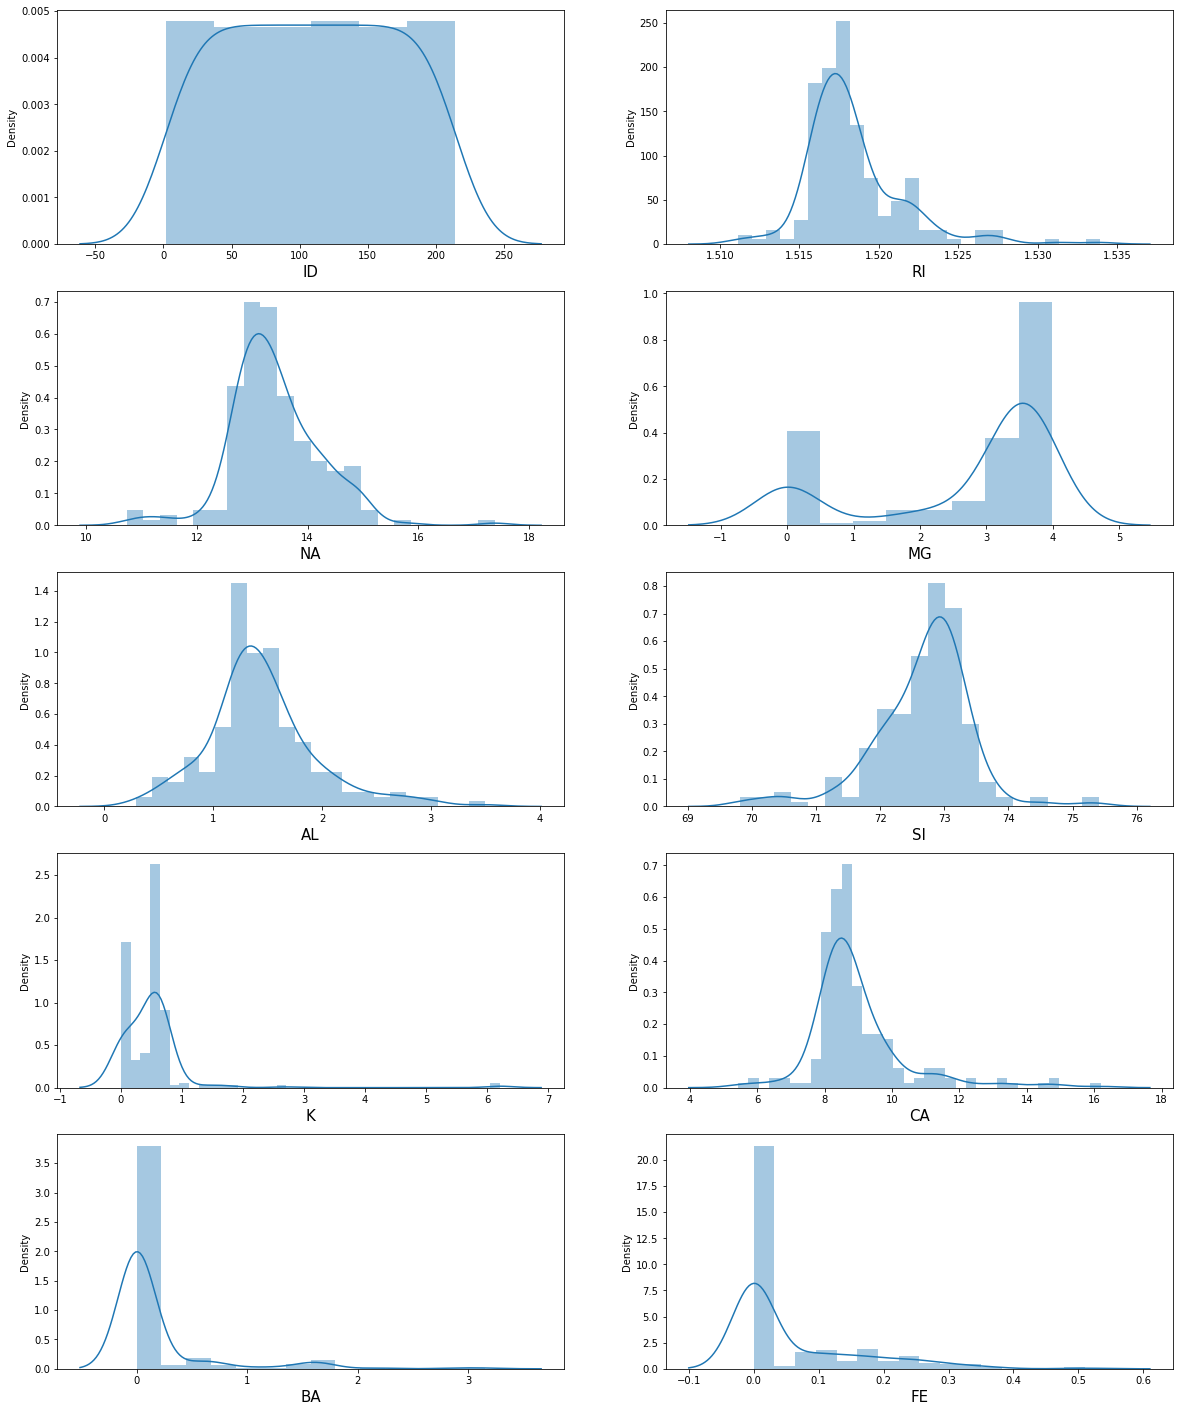

In [30]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in data_features:
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        ax=sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [31]:
# none of the features is normally distributed.The features of pottasium(K) and barium(ba) seems to contain many outliers

In [33]:
# finding outliers
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
iqr

ID                106.00000
RI                  0.00263
NA                  0.93000
MG                  1.51000
AL                  0.44000
SI                  0.81000
K                   0.48000
CA                  0.94000
BA                  0.00000
FE                  0.10000
Types of glass      2.00000
dtype: float64

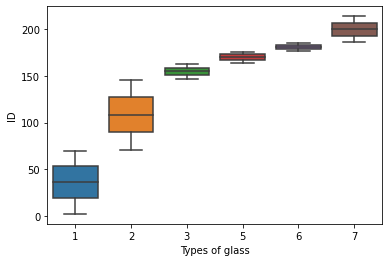

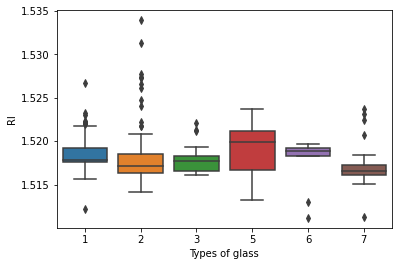

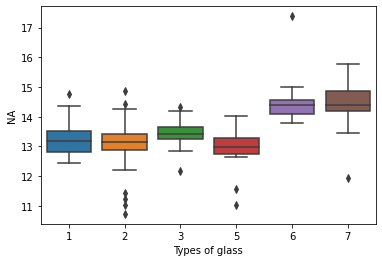

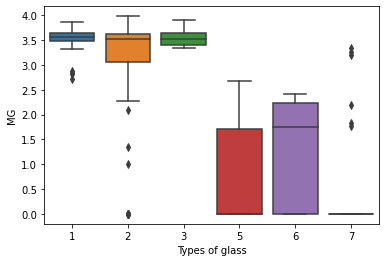

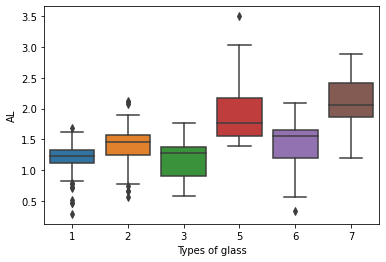

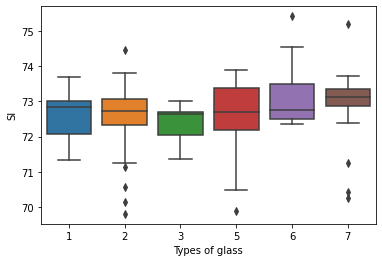

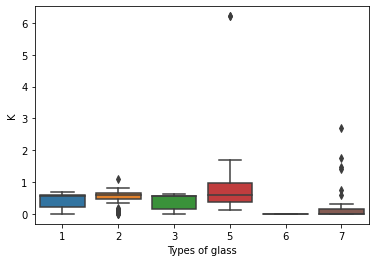

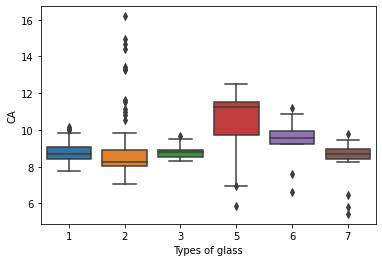

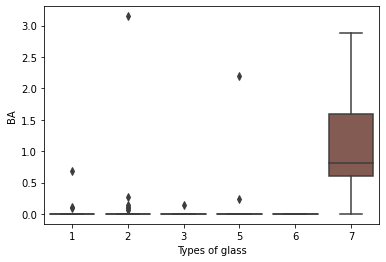

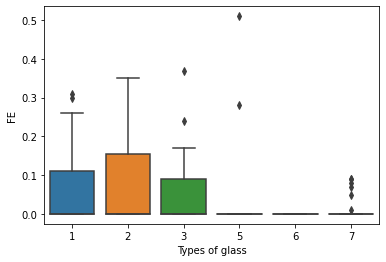

In [34]:
# before we remove outliers lets check the boxplot for each feature
feature_names=data.columns
for i in range(len(feature_names)-1):
    figure=plt.figure()
    ax=sns.boxplot(x='Types of glass',y=feature_names[i],data=data)

In [35]:
# There are some extreme cases in K,Ba and Fe.that is why it is necessary to remove outliers

<function matplotlib.pyplot.show(close=None, block=None)>

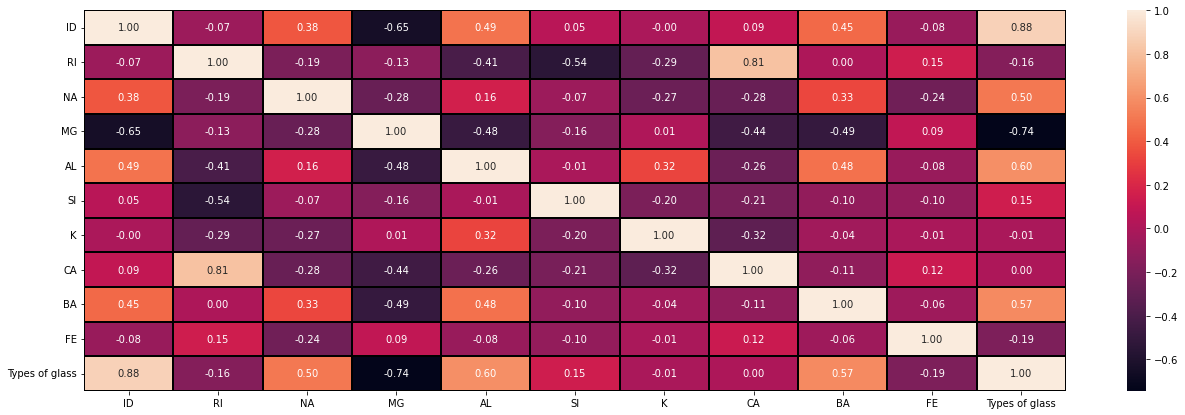

In [38]:
# lets examine the heatmap of the correlations
corr=data[features].corr()
plt.figure(figsize=(22,7))
sns.heatmap(corr,annot=True,linewidth=0.1,linecolor='black',fmt='0.2f',xticklabels=features,yticklabels=features)
plt.show

In [37]:
features=data.columns

In [39]:
# The above heatmap shows there is strong correlation between RI and CA

In [41]:
import numpy as np

In [40]:
ri=(q3.RI+(1.5*iqr.RI))
print(ri)

1.5230949999999999


In [42]:
abc=np.where(data['RI']>ri)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

(199, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
194,208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
195,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
196,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
197,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [43]:
na=(q3.NA+(1.5*iqr.NA))
print(na)
abc=np.where(data['NA']>na)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

15.225
(198, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
193,208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
194,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
195,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
196,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [44]:
mg=(q3.MG+(1.5*iqr.MG))
print(mg)
abc=np.where(data['MG']>mg)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

5.865
(198, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
193,208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
194,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
195,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
196,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [45]:
al=(q3.AL+(1.5*iqr.AL))
print(al)
abc=np.where(data['AL']>al)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

2.29
(185, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
180,206,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00,7
181,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
182,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
183,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [46]:
si=(q3.SI+(1.5*iqr.SI))
print(si)
abc=np.where(data['SI']>si)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

74.305
(182, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
177,206,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00,7
178,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
179,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
180,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [47]:
k=(q3.K+(1.5*iqr.K))
print(k)
abc=np.where(data['K']>k)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

1.33
(179, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
174,205,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7
175,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
176,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
177,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [48]:
ca=(q3.CA+(1.5*iqr.CA))
print(ca)
abc=np.where(data['CA']>ca)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

10.59
(169, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
164,205,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7
165,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
166,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
167,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [49]:
ba=(q3.BA+(1.5*iqr.BA))
print(ba)
abc=np.where(data['BA']>ba)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

0.0
(147, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
142,176,178,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.00,6
143,177,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.00,6
144,178,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.00,6
145,180,182,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.00,6


In [50]:
fe=(q3.FE+(1.5*iqr.FE))
print(fe)
abc=np.where(data['FE']>fe)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

0.25
(139, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
134,176,178,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
135,177,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
136,178,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6
137,180,182,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0,6


In [51]:
# removing down outliers
dca=(q1.CA-(1.5*iqr.CA))
print(dca)
abc=np.where(data['CA']<dca)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

6.830000000000001
(139, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
134,176,178,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
135,177,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
136,178,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6
137,180,182,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0,6


In [52]:
# removing down outliers
dsi=(q1.SI-(1.5*iqr.SI))
print(dsi)
abc=np.where(data['SI']<dsi)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

71.065
(138, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
133,175,177,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6
134,176,178,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
135,177,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
136,178,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6


In [53]:
# removing down outliers
dal=(q1.AL-(1.5*iqr.AL))
print(dal)
abc=np.where(data['AL']<dal)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

0.53
(135, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
130,175,177,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6
131,176,178,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
132,177,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
133,178,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6


In [54]:
# removing down outliers
dmg=(q1.MG-(1.5*iqr.MG))
print(dmg)
abc=np.where(data['MG']<dmg)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

-0.1750000000000007
(135, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
130,175,177,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6
131,176,178,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
132,177,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
133,178,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6


In [55]:
# removing down outliers
dna=(q1.NA-(1.5*iqr.NA))
print(dna)
abc=np.where(data['NA']<dna)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

11.505
(135, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
130,175,177,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6
131,176,178,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
132,177,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
133,178,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6


In [56]:
# removing down outliers
dri=(q1.RI-(1.5*iqr.RI))
print(dri)
abc=np.where(data['RI']<dri)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

1.5125750000000002
(135, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
130,175,177,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6
131,176,178,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
132,177,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
133,178,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6


In [57]:
# removing down outliers
dk=(q1.K-(1.5*iqr.K))
print(dk)
abc=np.where(data['K']<dk)
data=data.drop(data.index[abc])
print(data.shape)
data.reset_index()

-0.59
(135, 11)


,index,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
130,175,177,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6
131,176,178,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
132,177,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
133,178,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6


In [58]:
# removed the outliers 
data['Types of glass'].value_counts()

1    58
2    55
3    15
6     5
5     2
Name: Types of glass, dtype: int64

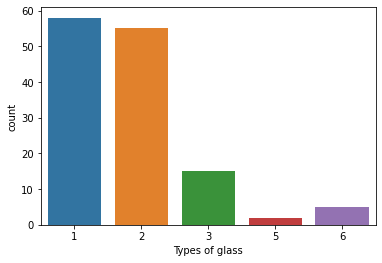

In [59]:
# lets see the count plot of new data
sns.countplot(data['Types of glass'])
plt.show()

In [60]:
#divide the dataset into features and label
# dropping the id column also
data.drop("ID",axis=1)

,RI,NA,MG,AL,SI,K,CA,BA,FE,Types of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
5,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
175,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6
176,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
177,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
178,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6


In [61]:
x=data.drop(columns=["Types of glass"])
y=data["Types of glass"]

In [62]:
# lets import necessary libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [64]:
# lets split the dataset into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [65]:
# lets scale the data
from sklearn.preprocessing import StandardScaler

In [66]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [72]:
# evaluate algorithms
# for this we will define one function
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n =========train result========")
        print(f"accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n=========test result========")
        print(f"accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
    
    
            
       
   



In [70]:
# initialize the model decision tree classifier
dt=DecisionTreeClassifier()

In [71]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
# call the function and pass tge dataset
# this is for training score
metric_score(dt,x_train,x_test,y_train,y_test,train=True)
# this is for testing score
metric_score(dt,x_train,x_test,y_train,y_test,train=False)




 =========train result========
accuracy score:100.00%

=========test result========
accuracy score:100.00%


In [79]:
# initialising random forestclassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
# call the function and pass tge dataset
# this is for training score
metric_score(rf,x_train,x_test,y_train,y_test,train=True)
# this is for testing score
metric_score(rf,x_train,x_test,y_train,y_test,train=False)




 =========train result========
accuracy score:100.00%

=========test result========
accuracy score:97.06%


In [81]:
# initialising k neighborsclassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [82]:
# call the function and pass tge dataset
# this is for training score
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
# this is for testing score
metric_score(knn,x_train,x_test,y_train,y_test,train=False)




 =========train result========
accuracy score:98.02%

=========test result========
accuracy score:97.06%


In [83]:
# initializing logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [84]:
# call the function and pass tge dataset
# this is for training score
metric_score(lr,x_train,x_test,y_train,y_test,train=True)
# this is for testing score
metric_score(lr,x_train,x_test,y_train,y_test,train=False)




 =========train result========
accuracy score:100.00%

=========test result========
accuracy score:100.00%


In [86]:
# cross validation score to see if the model is overfitting
cross_val_score(knn,x_scaled,y,cv=5)

array([0.85185185, 0.88888889, 0.81481481, 0.74074074, 0.81481481])

In [88]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=5).mean()

0.8222222222222222

In [89]:
cross_val_score(lr,x_scaled,y,cv=5)
cross_val_score(LogisticRegression(),x_scaled,y,cv=5).mean()

0.9185185185185185

In [90]:
cross_val_score(dt,x_scaled,y,cv=5)
cross_val_score(DecisionTreeClassifier(),x_scaled,y,cv=5).mean()

0.8592592592592592

In [91]:
cross_val_score(rf,x_scaled,y,cv=5)
cross_val_score(RandomForestClassifier(),x_scaled,y,cv=5).mean()

0.9259259259259259

In [92]:
# confusion matrix
y_pred=rf.predict(x_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  1,  3]], dtype=int64)

In [93]:
# confusion matrix
y_pred=dt.predict(x_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  4]], dtype=int64)

In [94]:
# saving the model
import pickle

In [95]:
pickle.dump(rf,open('glass_model','wb'))

In [96]:
loaded_model=pickle.load(open('glass_model','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

97.05882352941177


In [97]:
#=========Thank You==============